<a id="0"></a>

<h1 style='background:#007fff;border:0; color:white;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.25);
    transform: rotateX(10deg); border-radius: 25px;
    '><center>Check Python Version</center></h1>

# START


In [50]:
!python --version
!echo "Code by -- Tanvir Anjom Siddique"

Python 3.13.5


"Code by -- Tanvir Anjom Siddique"


<a id="1"></a>

<h1 style='background:#007fff;border:0; color:white;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.25);
    transform: rotateX(10deg); border-radius: 25px;
    '><center>Imports & Library Versions</center></h1>

# Imports and Custom Plot Settings
## Single Model Evaluation with ROC-AUC and K-Fold Comparison

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.ensemble import RandomForestClassifier


## Custom Plot Settings


In [52]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "font.family": "Times New Roman",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

<a id="2"></a>

<h1 style='background:#007fff;border:0; color:white;
box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.25);
    transform: rotateX(10deg); border-radius: 25px;
    '><center>
    Dataset Preprocessing
    </center>
</h1>

## Load Dataset


In [53]:
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names
n_classes = len(class_names)

X.shape, y.shape, class_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

## Standardize features


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

<a id="3"></a>

<h1 style='background:#007fff;border:0; color:white;
box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.25);
    transform: rotateX(10deg); border-radius: 25px;
    '><center>
    Training Models 
    </center>
</h1>

## Train a Single Model (Normal Split)


In [ ]:
model = RandomForestClassifier(random_state=42)
# Training time
start_train = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_train
# Prediction time
start_pred = time.time()
y_pred = model.predict(X_test)
testing_time = time.time() - start_pred

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print(f"Training Time: {training_time:.4f} s")
print(f"Testing/Prediction Time: {testing_time:.4f} s")

Test Accuracy: 0.8889
Training Time: 0.1803 s
Testing/Prediction Time: 0.0051 s


<a id="4"></a>
<h1 style='background:#007fff;border:0; color:white;
box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.25);
    transform: rotateX(10deg); border-radius: 25px;
    '><center>
    Evaluating Model Performance
    </center>
</h1>

A confusion matrix is a tabular representation that summarizes the number of correct and incorrect predictions made by a classifier. It helps identify not only overall accuracy but also the types of errors (false positives and false negatives) made by the model.

For a binary classification problem, the confusion matrix typically has the following structure:

<html> <table border="1" cellpadding="6" cellspacing="0" style="border-collapse:collapse; text-align:center;"> <thead> <tr> <th style="background:#f0f0f0;"></th> <th style="background:#f0f0f0;">Predicted Positive</th> <th style="background:#f0f0f0;">Predicted Negative</th> </tr> </thead> <tbody> <tr> <td><b>Actual Positive</b></td> <td>True Positive (TP)</td> <td>False Negative (FN)</td> </tr> <tr> <td><b>Actual Negative</b></td> <td>False Positive (FP)</td> <td>True Negative (TN)</td> </tr> </tbody> </table> </html>

<br><br>

<html> <table border="1" cellpadding="6" cellspacing="0" style="border-collapse:collapse; text-align:center;"> <thead> <tr style="background:#f0f0f0;"> <th>Actual / Predicted</th> <th>Predicted A</th> <th>Predicted B</th> <th>Predicted C</th> </tr> </thead> <tbody> <tr> <td><b>Actual A</b></td> <td>True A (Correct A→A)</td> <td>Misclassified A→B</td> <td>Misclassified A→C</td> </tr> <tr> <td><b>Actual B</b></td> <td>Misclassified B→A</td> <td>True B (Correct B→B)</td> <td>Misclassified B→C</td> </tr> <tr> <td><b>Actual C</b></td> <td>Misclassified C→A</td> <td>Misclassified C→B</td> <td>True C (Correct C→C)</td> </tr> </tbody> </table> </html>

<br><br>

Key Metrics Derived from the Matrix

Several important evaluation metrics can be calculated using these four values:

<html> <table border="0" cellpadding="6" cellspacing="0" style="border-collapse:collapse;"> <tbody> <tr> <td style="vertical-align:top; width:160px;"><b>Accuracy</b></td> <td style="vertical-align:top;"><code>Accuracy = (TP + TN) / (TP + TN + FP + FN)</code></td> </tr> <tr> <td style="vertical-align:top;"><b>Precision</b></td> <td style="vertical-align:top;"><code>Precision = TP / (TP + FP)</code></td> </tr> <tr> <td style="vertical-align:top;"><b>Recall (Sensitivity)</b></td> <td style="vertical-align:top;"><code>Recall = TP / (TP + FN)</code></td> </tr> <tr> <td style="vertical-align:top;"><b>F1-Score</b></td> <td style="vertical-align:top;"><code>F1 = 2 × (Precision × Recall) / (Precision + Recall)</code></td> </tr> <tr> <td style="vertical-align:top;"><b>Specificity</b></td> <td style="vertical-align:top;"><code>Specificity = TN / (TN + FP)</code></td> </tr> </tbody> </table> </html>
Interpretation Notes

- Accuracy measures the proportion of correctly classified instances but may be misleading for imbalanced datasets.

- Precision indicates how many of the predicted positive cases are actually positive.

- Recall (Sensitivity) shows how well the model detects positive instances.

- F1-Score balances precision and recall into a single performance measure.

- Specificity evaluates the model’s effectiveness in identifying negative cases correctly.

<html><code>Specificity = TN / (TN + FP)</code></html>

<br>
ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve is a graphical tool that illustrates the diagnostic ability of a binary classifier as its discrimination threshold varies. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

<html> <table border="0" cellpadding="6" cellspacing="0" style="border-collapse:collapse;"> <tbody> <tr> <td style="vertical-align:top; width:200px;"><b>True Positive Rate (TPR)</b></td> <td style="vertical-align:top;"><code>TPR = TP / (TP + FN)</code></td> </tr> <tr> <td style="vertical-align:top;"><b>False Positive Rate (FPR)</b></td> <td style="vertical-align:top;"><code>FPR = FP / (FP + TN)</code></td> </tr> </tbody> </table> </html>

The Area Under the Curve (AUC) provides a single numerical value summarizing the ROC curve. It quantifies how well the classifier separates positive and negative classes.

- AUC = 1.0: Perfect classifier (ideal separation)

- AUC = 0.5: Random guessing (no discrimination ability)

- AUC < 0.5: Model performs worse than random

<br>

In essence, ROC–AUC gives an aggregate measure of performance across all possible classification thresholds, making it a valuable metric for imbalanced or threshold-dependent classification tasks.


## Confusion Matrix as Heatmap (normal split)


Confusion Matrix (DataFrame):


,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,4,11


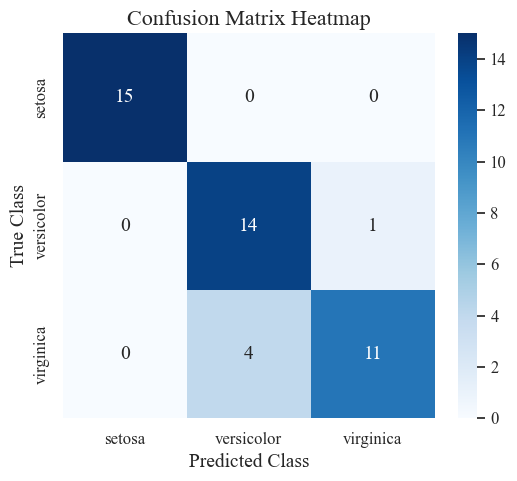

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix (DataFrame):")
display(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Classification Report as Heatmap


Classification Report (DataFrame):


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.777778,0.933333,0.848485,15.000000
virginica,0.916667,0.733333,0.814815,15.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.898148,0.888889,0.887767,45.000000
weighted avg,0.898148,0.888889,0.887767,45.000000


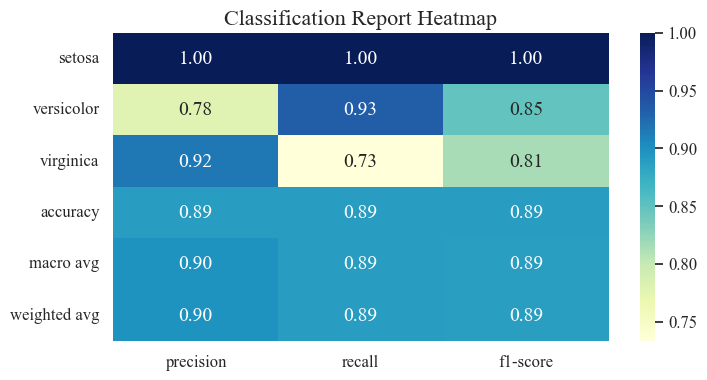

In [58]:
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("Classification Report (DataFrame):")
display(report_df)

report_heatmap = report_df.drop(columns=["support"])
plt.figure(figsize=(8,4))
sns.heatmap(report_heatmap, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


## ROC-AUC Score (Multi-class)


### Explanation of ROC–AUC and ROC Curve Code (Multi-Class)

This block of code calculates and visualizes the **ROC–AUC (Receiver Operating Characteristic – Area Under Curve)** for a **multi-class classification** problem using the **One-vs-Rest (OvR)** approach.


#### 1. Check if the model supports probability prediction
```python
if hasattr(model, "predict_proba"):
````

* Ensures that the model can output class probabilities using `predict_proba()`.
* Some models (e.g., SVM without probability calibration) do not support this method, so this check prevents errors.


#### 2. Convert class labels into binary format

```python
y_test_bin = label_binarize(y_test, classes=range(n_classes))
```

* Converts multi-class labels (e.g., `[0, 1, 2]`) into binary indicators:

  ```
  [[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]
  ```
* Required because ROC curves are computed in a **binary** “one class vs. rest” format.


#### 3. Predict class probabilities

```python
y_score = model.predict_proba(X_test)
```

* Produces a probability matrix where each column represents the likelihood of belonging to a specific class.
* Example:

  ```
  [[0.8, 0.1, 0.1],
   [0.2, 0.7, 0.1],
   [0.1, 0.2, 0.7]]
  ```



#### 4. Compute the overall ROC–AUC score

```python
roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
print(f"ROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")
```

* `roc_auc_score()` measures how well the model distinguishes each class from the others.
* The argument `multi_class="ovr"` applies the **One-vs-Rest** strategy:

  * Computes AUC for each class against all others.
  * Returns the average AUC score.
* A value closer to **1.0** indicates better separability.



#### 5. Plot ROC curves for each class

```python
plt.figure(figsize=(7,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, lw=2, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})")
```

* For each class:

  * `roc_curve()` calculates:

    * **fpr** → False Positive Rate
    * **tpr** → True Positive Rate
  * `auc(fpr, tpr)` computes the Area Under the Curve for that class.
  * Each ROC curve is plotted with its class label and AUC value.



#### 6. Add a reference line and display the plot

```python
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curve (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
```

* The diagonal line (`[0,1]–[0,1]`) represents a **random classifier** (AUC = 0.5).
* The further each curve is from this line (toward the top-left corner), the better the classifier’s performance.
* The legend shows each class’s AUC score.



### Summary of Outputs

1. **ROC–AUC Score (One-vs-Rest):**
   A numerical summary of how well the model separates multiple classes.

2. **ROC Curves:**
   A graphical visualization showing the trade-off between True Positive Rate and False Positive Rate for each class.

   * Curves closer to the top-left corner indicate higher predictive performance.



ROC-AUC Score (One-vs-Rest): 0.9893


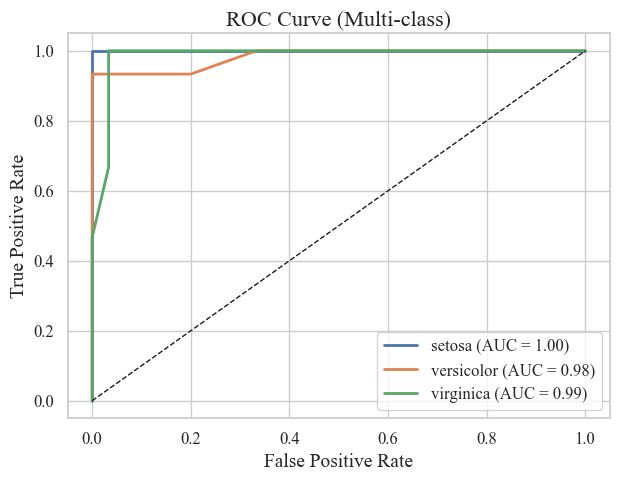

In [59]:
if hasattr(model, "predict_proba"):
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    y_score = model.predict_proba(X_test)
    
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
    print(f"ROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")

    # Plot ROC curves
    plt.figure(figsize=(7,5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})")
    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.title("ROC Curve (Multi-class)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


## K-Fold Cross-Validation (Accuracy only)


### Understanding K-Fold Cross-Validation and Fold Accuracies

K-Fold Cross-Validation is a **resampling technique** used to evaluate the performance and generalization ability of a machine learning model.  
It provides a more reliable estimate of model accuracy than a single train-test split.



#### 1. Concept of K-Fold Cross-Validation

- The dataset is **divided into K equal parts (folds)**.  
  Example: If K = 5, the dataset is split into 5 subsets of roughly equal size.

- The process runs **K separate training and testing experiments**:
  - In each iteration, **one fold is used as the test (validation) set**.
  - The **remaining K-1 folds** are combined and used for training.
  - The model is then trained on the training folds and evaluated on the test fold.

- This ensures that **every sample** in the dataset is used once for testing and K–1 times for training.



#### 2. What Does Each Fold’s Accuracy Represent?

In each iteration:

1. The model is **trained** on (K–1) folds (for example, 4 out of 5 folds).
2. It is then **tested** on the **remaining 1 fold**, which was not seen during training.
3. The **accuracy obtained from that fold** represents the model’s **testing (validation) accuracy** on unseen data.

Hence,  
**Fold accuracy = Validation/Test Accuracy** for that specific split.



#### 3. Example (5-Fold Cross-Validation)

Let the dataset be divided as follows:

| Fold | Used for Training | Used for Testing | Accuracy (Fold) |
|------|-------------------|------------------|-----------------|
| 1 | Folds 2,3,4,5 | Fold 1 | 0.93 |
| 2 | Folds 1,3,4,5 | Fold 2 | 0.96 |
| 3 | Folds 1,2,4,5 | Fold 3 | 0.91 |
| 4 | Folds 1,2,3,5 | Fold 4 | 0.94 |
| 5 | Folds 1,2,3,4 | Fold 5 | 0.95 |

After all 5 iterations:

- The **average accuracy** across all folds gives the **cross-validation accuracy**.
- This average indicates the **expected model performance on unseen data**.

**Example Result:**
```

5-Fold Cross-Validation Accuracy: 0.9380 ± 0.0170

```



#### 4. Why Use Stratified K-Fold?

- **StratifiedKFold** ensures that each fold maintains the **same class distribution** as the original dataset.  
- It is particularly important for **classification tasks**, where some classes may have fewer samples.



#### 5. Key Advantages of K-Fold Cross-Validation

1. **Better performance estimation** than a single train-test split.
2. **Reduced bias**, since every data point gets a chance to be in the test set.
3. **Efficient data usage**, especially for small datasets.
4. **More reliable model comparison** when testing multiple algorithms.



#### 6. Summary

| Term | Description |
|------|--------------|
| **Training Data (in each fold)** | (K–1) folds used to fit the model |
| **Validation/Test Data (in each fold)** | The remaining fold used for evaluation |
| **Fold Accuracy** | Performance (accuracy) on the validation fold |
| **Final CV Accuracy** | Mean accuracy across all folds |
| **Purpose** | To measure model stability and generalization ability |



In summary,  
**K-Fold Cross-Validation** trains and tests the model K times on different data partitions.  
Each fold’s accuracy reflects how well the model performs on unseen data, providing a fair and unbiased evaluation of its true predictive capability.
```


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")
print(f"cross_val_score: \n", cv_scores)
cv_acc = cv_scores.mean()
print(f"5-Fold Cross-Validation Accuracy: {cv_acc:.4f} +- {cv_scores.std():.4f}")

cross_val_score: 
 [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
5-Fold Cross-Validation Accuracy: 0.9467 ± 0.0267


### Explanation of K-Fold Cross-Validation Code

This section performs **Stratified K-Fold Cross-Validation** using the `cross_val_score()` function from Scikit-learn to evaluate the model’s stability and generalization performance.


#### 1. Define Stratified K-Fold object
```python
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
````

* **Purpose:**
  Splits the dataset into *k* parts (here, 5 folds) while maintaining the **class distribution** (stratification) in each fold.
* **Parameters:**

  * `n_splits=5` → The dataset is divided into 5 subsets.
  * `shuffle=True` → Randomly shuffles the data before splitting to reduce bias.
  * `random_state=42` → Ensures reproducibility of the random shuffle.

**Process:**

* The model will train on 4 folds and validate on the remaining 1 fold.
* This process repeats 5 times, each time using a different fold for validation.


#### 2. Perform cross-validation

```python
cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")
```

* **Function:** `cross_val_score()` automatically handles:

  1. Splitting the data according to the defined K-Fold strategy.
  2. Training and testing the model for each fold.
  3. Collecting performance scores (here, **accuracy**) for each fold.
* **Parameters:**

  * `model` → The machine learning model (e.g., RandomForestClassifier).
  * `X_scaled` → Input features (standardized dataset).
  * `y` → Target labels.
  * `cv=kfold` → Uses the 5-fold stratified cross-validation configuration.
  * `scoring="accuracy"` → Evaluates accuracy for each fold.

**Output:**
`cv_scores` is a NumPy array containing the accuracy for each fold, for example:
`[0.93, 0.97, 0.90, 0.95, 0.94]`



#### 3. Display individual fold accuracies

```python
print(f"cross_val_score: \n", cv_scores)
```

* Prints the array of accuracies obtained from each of the 5 folds.

**Example Output:**

```
cross_val_score:
[0.9333 0.9667 0.9000 0.9333 0.9667]
```


#### 4. Compute mean and standard deviation of accuracy

```python
cv_acc = cv_scores.mean()
print(f"5-Fold Cross-Validation Accuracy: {cv_acc:.4f} ± {cv_scores.std():.4f}")
```

* `cv_scores.mean()` → Calculates the average accuracy across all folds.
* `cv_scores.std()` → Measures the variation (spread) of accuracy values.

**Example Output:**

```
5-Fold Cross-Validation Accuracy: 0.9400 ± 0.0230
```

This means:

* The model achieves an **average accuracy** of **94%** across 5 folds.
* The **± 2.3%** represents the variation among folds, indicating how consistently the model performs on different data subsets.



### Summary

| Step | Description                                    | Output                           |
| ---- | ---------------------------------------------- | -------------------------------- |
| 1    | Split dataset into 5 folds (StratifiedKFold)   | Maintains equal class ratios     |
| 2    | Train and test model using `cross_val_score()` | 5 accuracy values                |
| 3    | Compute mean and std of accuracies             | Average performance measure      |
| 4    | Display results                                | Average ± variation across folds |

**Purpose:**
This process ensures that the model’s performance is not dependent on a single random split, making the evaluation more reliable and generalizable.

```


## K-Fold Cross-Validation with Timing


In [61]:
train_times = []
test_times = []
cv_accuracies = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    # Training time
    start = time.time()
    model.fit(X_tr, y_tr)
    train_times.append(time.time() - start)

    # Testing/prediction time
    start = time.time()
    y_te_pred = model.predict(X_te)
    test_times.append(time.time() - start)

    # Accuracy
    cv_accuracies.append(accuracy_score(y_te, y_te_pred))

    print(f"Fold {fold}: Accuracy={cv_accuracies[-1]:.4f}, Train Time={train_times[-1]:.4f}s, Test Time={test_times[-1]:.4f}s")

# Convert per-fold metrics to DataFrame
cv_metrics = pd.DataFrame({
    "Fold": np.arange(1, kfold.get_n_splits() + 1),
    "Train Time (s)": train_times,
    "Test Time (s)": test_times,
    "Accuracy": cv_accuracies
})
display(cv_metrics)


Fold 1: Accuracy=0.9667, Train Time=0.1544s, Test Time=0.0103s
Fold 2: Accuracy=0.9667, Train Time=0.1331s, Test Time=0.0045s
Fold 3: Accuracy=0.9333, Train Time=0.1348s, Test Time=0.0101s
Fold 4: Accuracy=0.9667, Train Time=0.1227s, Test Time=0.0069s
Fold 5: Accuracy=0.9000, Train Time=0.1206s, Test Time=0.0050s


,Fold,Train Time (s),Test Time (s),Accuracy
0,1,0.154361,0.010326,0.966667
1,2,0.133082,0.004501,0.966667
2,3,0.134830,0.010054,0.933333
3,4,0.122688,0.006859,0.966667
4,5,0.120583,0.005001,0.900000


## Compare Normal Split vs K-Fold Metrics


In [62]:
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Training Time (s)", "Testing Time (s)"],
    "Normal Split": [acc, training_time, testing_time],
    "K-Fold (mean)": [np.mean(cv_accuracies), np.mean(train_times), np.mean(test_times)]
})
display(comparison_df)


,Metric,Normal Split,K-Fold (mean)
0,Accuracy,0.888889,0.946667
1,Training Time (s),0.180258,0.133109
2,Testing Time (s),0.005135,0.007348


## Bar plot for comparison


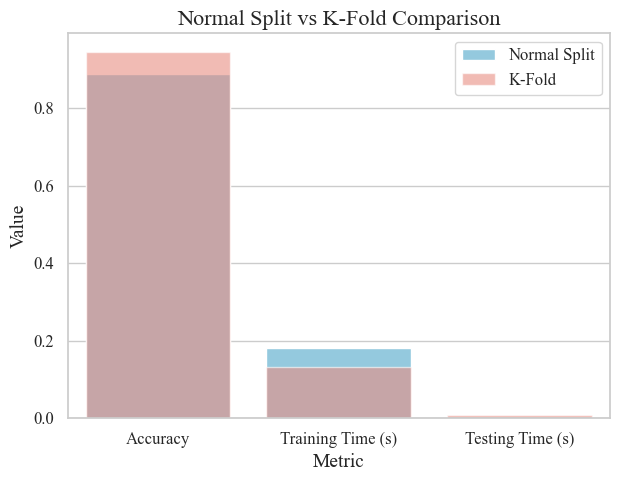

In [63]:
plt.figure(figsize=(7,5))
sns.barplot(x="Metric", y="Normal Split", data=comparison_df, color="skyblue", label="Normal Split")
sns.barplot(x="Metric", y="K-Fold (mean)", data=comparison_df, color="salmon", alpha=0.6, label="K-Fold")
plt.ylabel("Value")
plt.title("Normal Split vs K-Fold Comparison")
plt.legend()
plt.show()


## Barplot comparing normal vs K-fold training result


### Explanation of the Code (as Jupyter Notebook Markdown)


#### **Melt the DataFrame for Grouped Bar Plot**

```python
comparison_melt = comparison_df.melt(
    id_vars="Metric",
    value_vars=["Normal Split", "K-Fold (mean)"],
    var_name="Training Type",
    value_name="Value"
)
```

This part reshapes the original DataFrame `comparison_df` from a **wide format** to a **long format**, which is required by Seaborn for grouped bar plotting.

* **`id_vars="Metric"`** keeps the “Metric” column as it is.
* **`value_vars=["Normal Split", "K-Fold (mean)"]`** specifies the two columns that will be converted into key-value pairs.
* The resulting DataFrame will have three columns:

  * `Metric` → metric name (e.g., Accuracy, Training Time).
  * `Training Type` → type of training (Normal Split or K-Fold).
  * `Value` → corresponding numeric value.



#### **Create the Bar Plot**

```python
plt.figure(figsize=(8,5))
bar_plot = sns.barplot(
    x="Metric", 
    y="Value", 
    hue="Training Type", 
    data=comparison_melt, 
    palette=["skyblue", "salmon"]
)
```

This creates a grouped bar chart where:

* **x-axis** shows the metric names.
* **y-axis** represents their numeric values.
* **hue** groups the bars by training type (Normal Split vs. K-Fold).
* **palette** defines the colors for each group.



#### **Customize the Plot**

```python
plt.title("Normal Split vs K-Fold Comparison")
plt.ylabel("Value")
plt.xlabel("Metric")
```

These lines set the title and axis labels for better readability.



#### **Adjust the Y-Axis**

```python
plt.ylim(0, max(comparison_melt["Value"]) * 1.2)
```

This ensures the y-axis extends slightly above the tallest bar (20% extra space), allowing space for value labels.



#### **Format Y-Axis Tick Labels**

```python
yticks = np.linspace(0, max(comparison_melt["Value"]) * 1.2, 6)
plt.yticks(yticks, [f"{y:.3f}" for y in yticks])
```

This sets 6 evenly spaced y-axis tick marks, formatted to **three decimal places** (e.g., 0.000, 0.200, 0.400).



#### **Add a Legend**

```python
plt.legend(title="Training Type")
```

Displays a legend showing color labels for Normal Split and K-Fold.



#### **Annotate Bar Values**

```python
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
        bar_plot.annotate(f'{height:.3f}', 
                          (p.get_x() + p.get_width()/2., height),
                          ha='center', va='bottom', fontsize=12)
```

This loop:

* Iterates through each bar (patch) in the plot.
* Retrieves the bar height (`p.get_height()`), which represents the bar’s value.
* Places a text label above each bar showing its exact numeric value formatted to **three decimal places**.



#### **Display the Plot**

```python
plt.show()
```

Finally, this renders the bar chart comparing **Normal Split** and **K-Fold (mean)** for each evaluation metric.



**In summary:**
This code visualizes a side-by-side comparison between normal train-test split results and K-Fold cross-validation results for metrics such as accuracy, training time, and testing time, with well-formatted axes, color grouping, and numerical annotations.


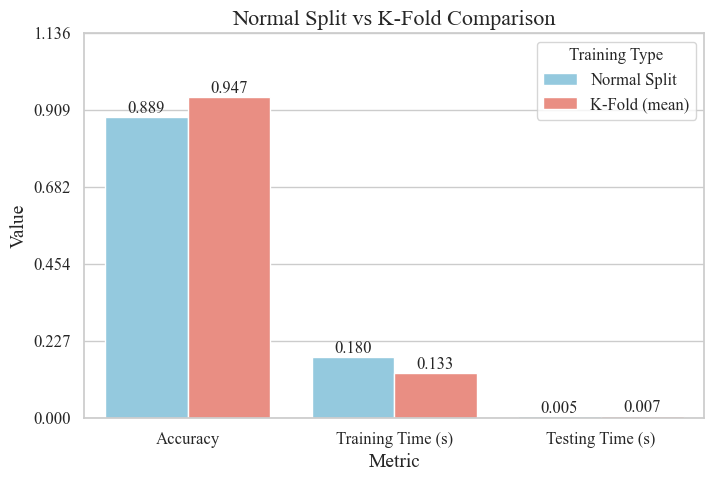

In [64]:
# Melt the DataFrame for seaborn's grouped barplot
comparison_melt = comparison_df.melt(
    id_vars="Metric",
    value_vars=["Normal Split", "K-Fold (mean)"],
    var_name="Training Type",
    value_name="Value"
)

plt.figure(figsize=(8,5))
bar_plot = sns.barplot(
    x="Metric", 
    y="Value", 
    hue="Training Type", 
    data=comparison_melt, 
    palette=["skyblue", "salmon"]
)

plt.title("Normal Split vs K-Fold Comparison")
plt.ylabel("Value")
plt.xlabel("Metric")

# Set custom y-axis limits slightly above max value
plt.ylim(0, max(comparison_melt["Value"]) * 1.2)

# Show y-ticks with 3 decimals but avoid unnecessary zero
yticks = np.linspace(0, max(comparison_melt["Value"]) * 1.2, 6)
plt.yticks(yticks, [f"{y:.3f}" for y in yticks])

plt.legend(title="Training Type")

# Add value labels on bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # annotate only bars with actual height
        bar_plot.annotate(f'{height:.3f}', 
                          (p.get_x() + p.get_width()/2., height),
                          ha='center', va='bottom', fontsize=12)

plt.show()



# Comparison of ML Models


In [65]:
# ============================================================
# Comprehensive ML Model Evaluation with Visualization
# Multi-class Classification Example (Iris Dataset)
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Sample Dataset
from sklearn.datasets import load_iris


## def evaluate_models(models, X_train, X_test, y_train, y_test, class_names):

In [66]:
# ============================================================
# Function Definition
# ============================================================

def evaluate_models(models, X_train, X_test, y_train, y_test, class_names):
    results = []
    sns.set_theme(style="whitegrid", font="Times New Roman", font_scale=1.2)

    for name, model in models.items():
        print(f"\nTraining model: {name} ...")

        # Training time
        start_train = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_train

        # Prediction time
        start_pred = time.time()
        y_pred = model.predict(X_test)
        pred_time = time.time() - start_pred

        # Cross-validation accuracy
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()

        # Metrics
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
        accuracy = report["accuracy"]

        # Store model performance
        results.append({
            "Model": name,
            "Test Accuracy": accuracy,
            "Cross-Validation Accuracy": cv_score,
            "Training Time (s)": train_time,
            "Prediction Time (s)": pred_time
        })

        # Confusion Matrix Heatmap
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        # Classification Report
        print(f"\nClassification Report - {name}")
        display(pd.DataFrame(report).transpose())

        # ROC-AUC Curve for Multi-class
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
            y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
            fpr, tpr, roc_auc = {}, {}, {}
            for i in range(len(class_names)):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            plt.figure(figsize=(6,5))
            for i in range(len(class_names)):
                plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC = {roc_auc[i]:.3f})")
            plt.plot([0,1], [0,1], 'k--', lw=1)
            plt.title(f"ROC Curve - {name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.show()

    # Summary DataFrame
    performance_df = pd.DataFrame(results)
    
    print("Performance Dataframe: ")
    display(performance_df)

    # Visualization of metrics
    metrics = [
        ("Test Accuracy", "viridis"),
        ("Cross-Validation Accuracy", "coolwarm"),
        ("Training Time (s)", "magma"),
        ("Prediction Time (s)", "cividis")
    ]

    for metric, palette in metrics:
        plt.figure(figsize=(8,5))
        sns.barplot(x="Model", y=metric, hue="Model", data=performance_df,
                    palette=palette, legend=False)
        plt.title(f"Model {metric} Comparison")
        plt.xticks(rotation=30)
        plt.ylabel(metric)
        plt.show()

    return performance_df



## Dataset Preparation

In [67]:
# ============================================================
# Dataset Preparation
# ============================================================

# Load Iris dataset (multi-class)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


## Define Models

In [68]:
# ============================================================
# Define Models
# ============================================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


## Run Evaluation


Training model: Logistic Regression ...


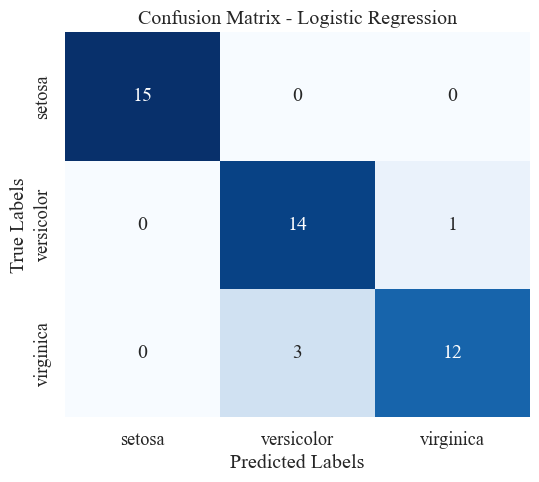


Classification Report - Logistic Regression


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.823529,0.933333,0.875000,15.000000
virginica,0.923077,0.800000,0.857143,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.915535,0.911111,0.910714,45.000000
weighted avg,0.915535,0.911111,0.910714,45.000000


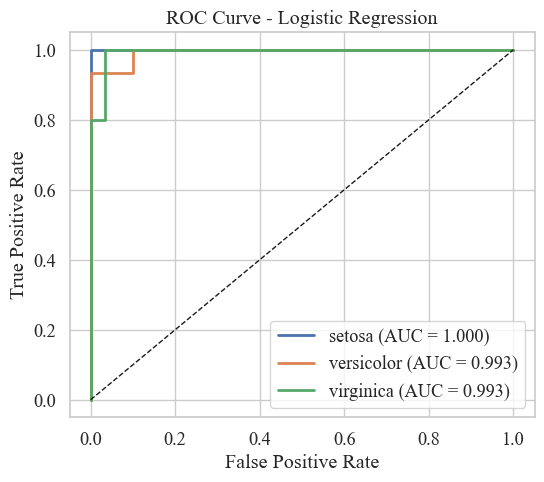


Training model: Decision Tree ...


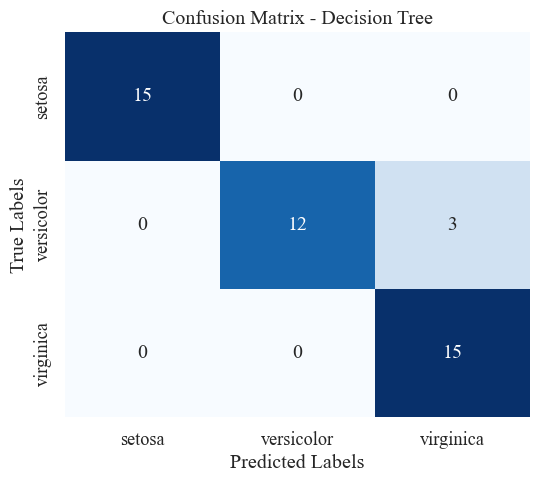


Classification Report - Decision Tree


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,1.000000,0.800000,0.888889,15.000000
virginica,0.833333,1.000000,0.909091,15.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.944444,0.933333,0.932660,45.000000
weighted avg,0.944444,0.933333,0.932660,45.000000


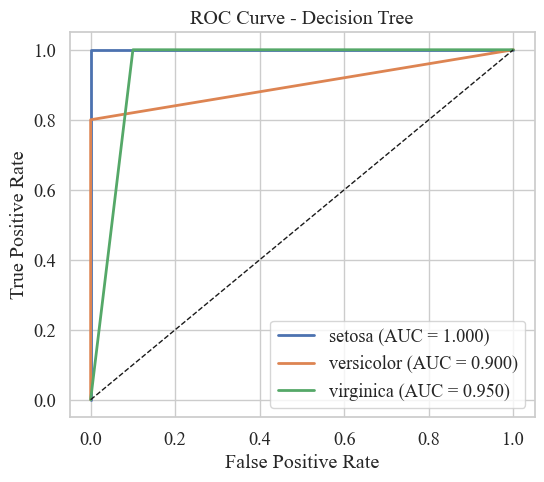


Training model: Random Forest ...


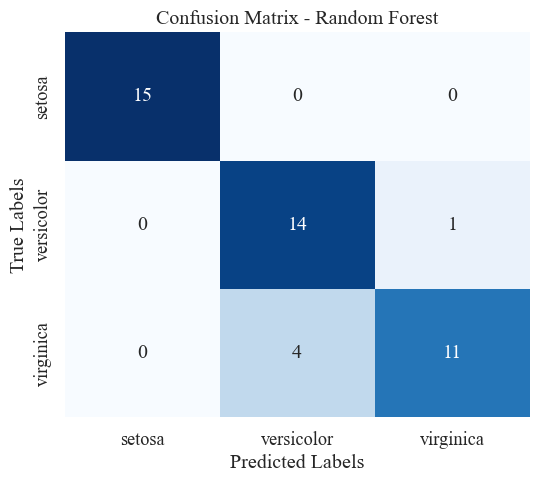


Classification Report - Random Forest


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.777778,0.933333,0.848485,15.000000
virginica,0.916667,0.733333,0.814815,15.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.898148,0.888889,0.887767,45.000000
weighted avg,0.898148,0.888889,0.887767,45.000000


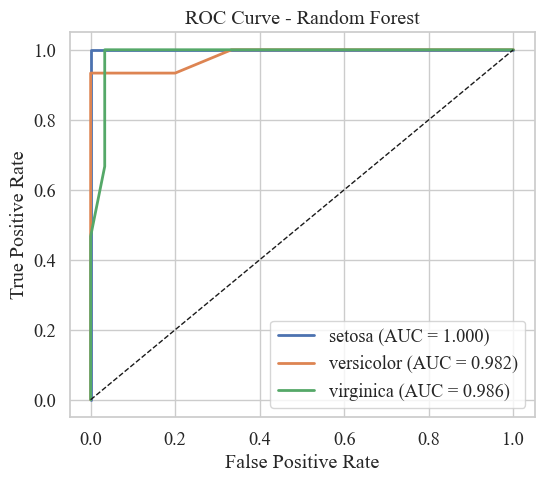


Training model: KNN ...


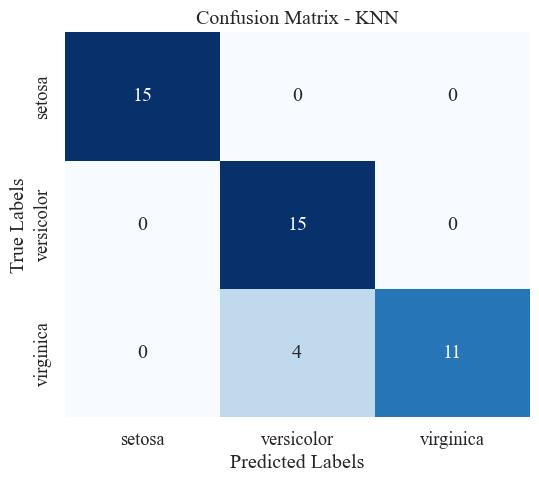


Classification Report - KNN


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.789474,1.000000,0.882353,15.000000
virginica,1.000000,0.733333,0.846154,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.929825,0.911111,0.909502,45.000000
weighted avg,0.929825,0.911111,0.909502,45.000000


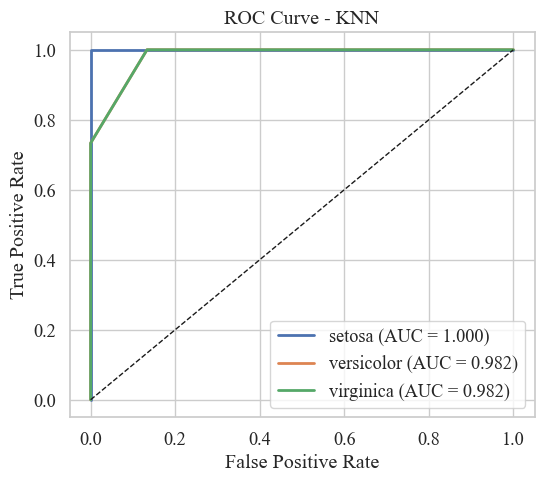


Training model: SVM (RBF) ...


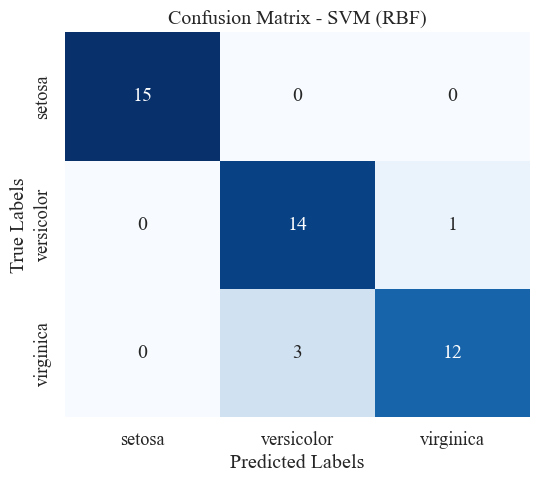


Classification Report - SVM (RBF)


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.823529,0.933333,0.875000,15.000000
virginica,0.923077,0.800000,0.857143,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.915535,0.911111,0.910714,45.000000
weighted avg,0.915535,0.911111,0.910714,45.000000


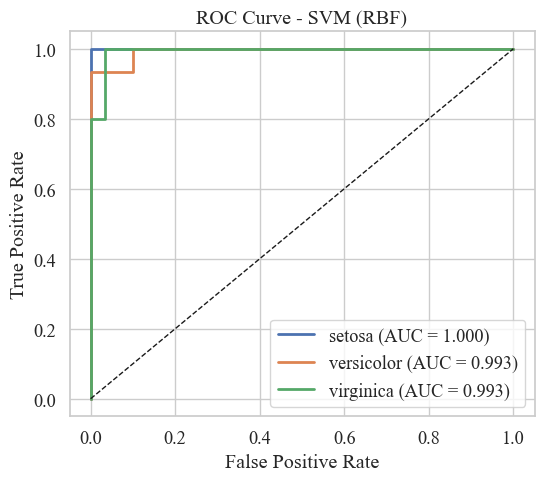


Training model: Naive Bayes ...


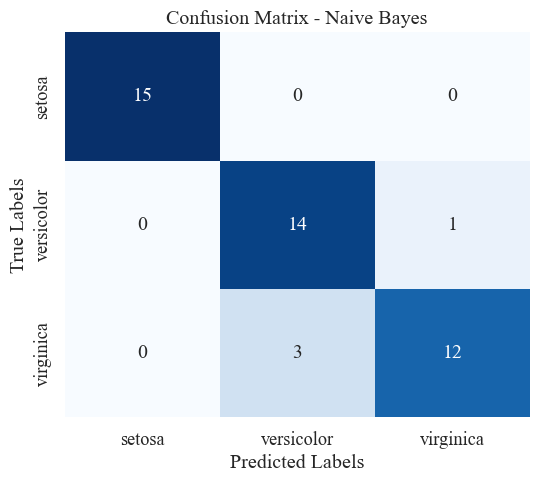


Classification Report - Naive Bayes


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.823529,0.933333,0.875000,15.000000
virginica,0.923077,0.800000,0.857143,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.915535,0.911111,0.910714,45.000000
weighted avg,0.915535,0.911111,0.910714,45.000000


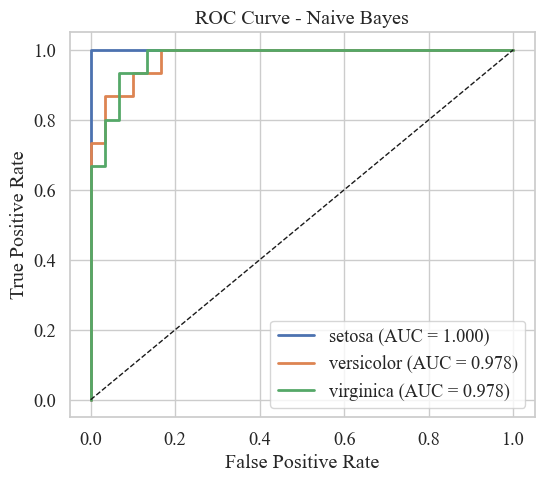


Training model: Gradient Boosting ...


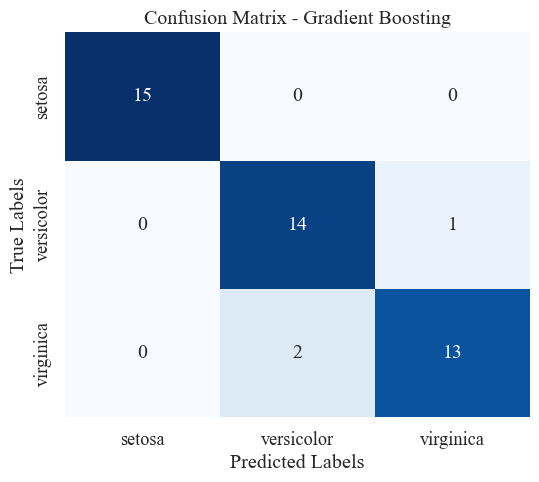


Classification Report - Gradient Boosting


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.875000,0.933333,0.903226,15.000000
virginica,0.928571,0.866667,0.896552,15.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.934524,0.933333,0.933259,45.000000
weighted avg,0.934524,0.933333,0.933259,45.000000


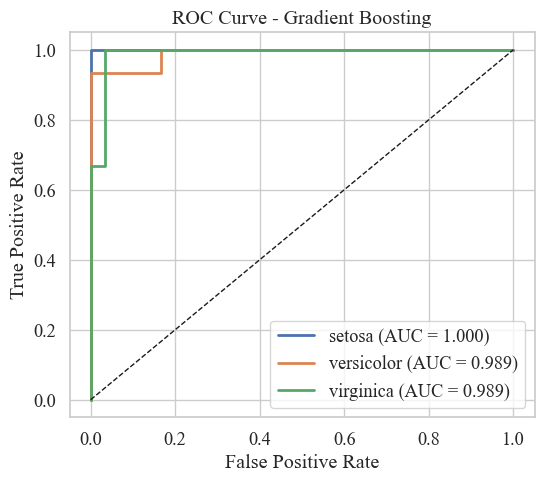

Performance Dataframe: 


,Model,Test Accuracy,Cross-Validation Accuracy,Training Time (s),Prediction Time (s)
0,Logistic Regression,0.911111,0.980952,0.011044,0.000434
1,Decision Tree,0.933333,0.933333,0.001195,0.000351
2,Random Forest,0.888889,0.952381,0.130830,0.005827
3,KNN,0.911111,0.933333,0.001370,0.007397
4,SVM (RBF),0.911111,0.971429,0.002535,0.000422
5,Naive Bayes,0.911111,0.980952,0.006857,0.000713
6,Gradient Boosting,0.933333,0.961905,0.420186,0.000958


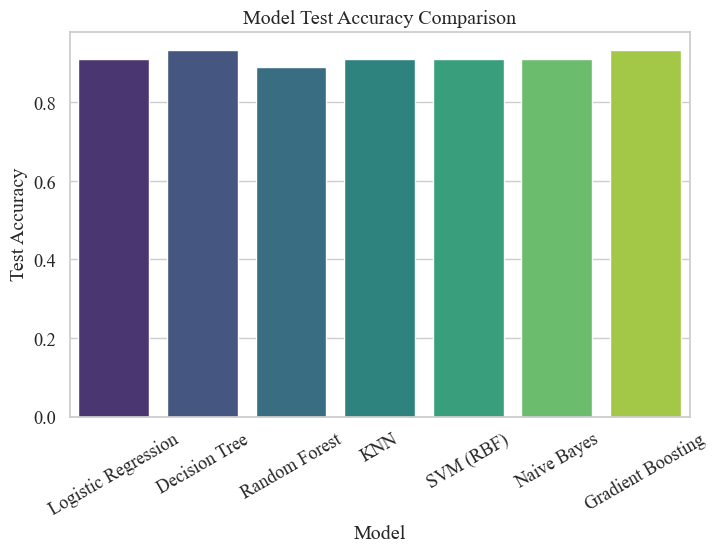

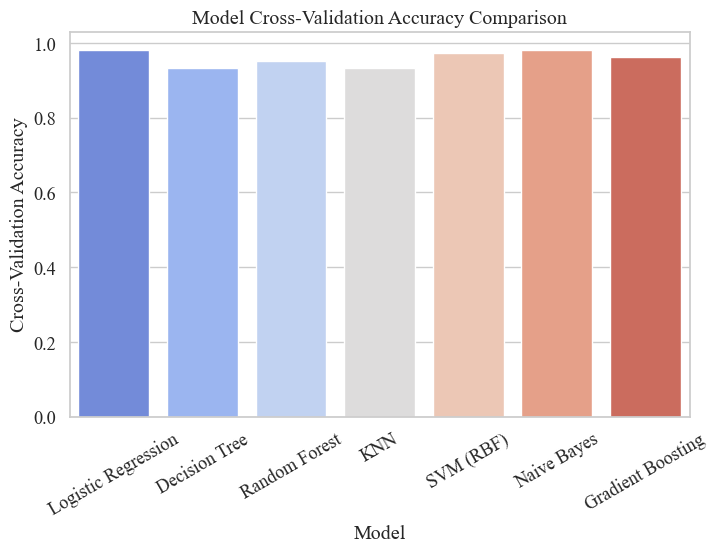

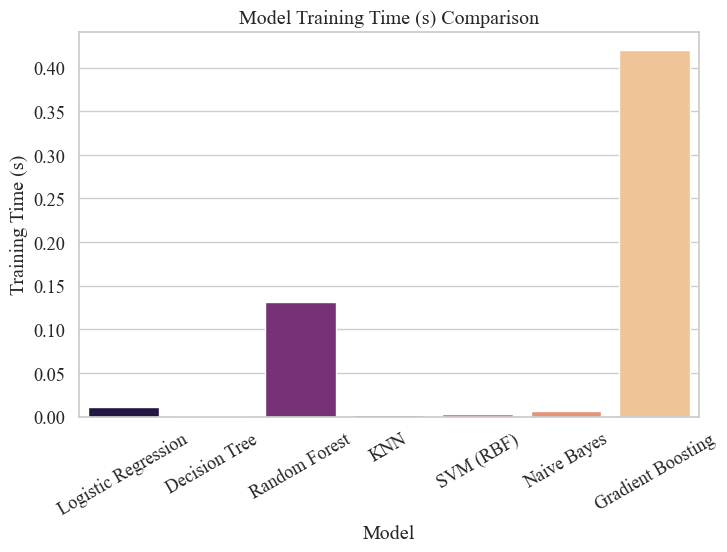

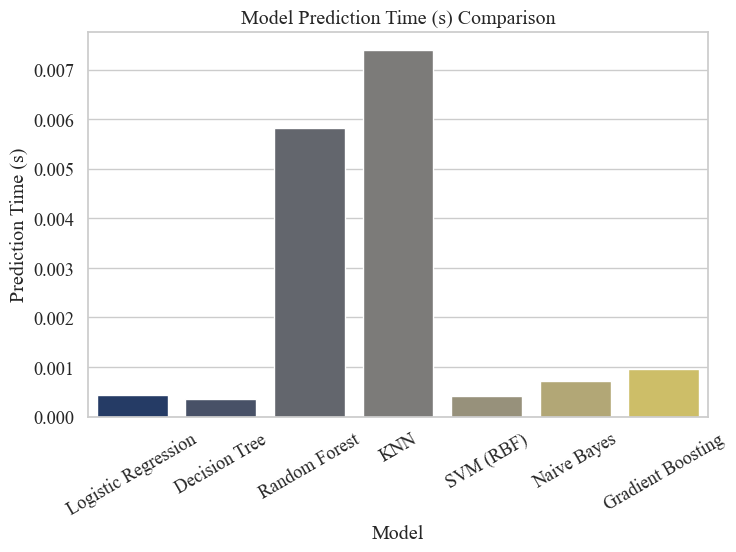

In [69]:
results_df = evaluate_models(models, X_train, X_test, y_train, y_test, class_names)


# END
